## Урок 1. Домашнее задание

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

Скопируем необходимые функции из лекции.

In [2]:
### Шаг 1. Определение функций, которые понадобятся для обучения


# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


def nn_2layer_training(X_train, X_test, y_train, y_test, neuron_numb=5, learning_rate=0.005, 
                       random_seed=42, epochs=1000):

    # массив для ошибок, чтобы потом построить график
    errors_list = []
    layer2_list = []
    w0_list = []
    w1_list = []
    accuracy_train_list = []
    accuracy_test_list = []
    
    for i in range(3):
        
        np.random.seed(random_seed+i)
        
        # присваивание случайных весов

        w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   
        w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя
        errors = []
        # процесс обучения
        for j in range(epochs):

            # прямое распространение(feed forward)
            layer0 = X_train
            layer1 = sigmoid(np.dot(layer0, w0))
            layer2 = sigmoid(np.dot(layer1, w1))

            # обратное распространение(back propagation) с использованием градиентного спуска
            layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
            layer2_delta = layer2_error * sigmoid_deriv(layer2)

            layer1_error = layer2_delta.dot(w1.T)
            layer1_delta = layer1_error * sigmoid_deriv(layer1)
            
            # коррекция
            w1 += layer1.T.dot(layer2_delta) * learning_rate
            w0 += layer0.T.dot(layer1_delta) * learning_rate
            
            # метрика модели
            error = np.mean(np.abs(layer2_error))
            errors.append(error)
            accuracy = (1 - error) * 100
            
            layer0_t = X_test
            layer1_t = sigmoid(np.dot(layer0_t, w0))
            layer2_t = sigmoid(np.dot(layer1_t, w1))
            layer2_error_t = y_test - layer2_t
            error_t = np.mean(np.abs(layer2_error_t))
            accuracy_t = (1 - error_t) * 100
            
        
        w0_list.append(w0)
        w1_list.append(w1)
        layer2_list.append(layer2)
        errors_list.append(errors)
        accuracy_train_list.append(accuracy) 
        accuracy_test_list.append(accuracy_t) 
        
        

    return np.mean(w0_list, axis=0), np.mean(w1_list, axis=0), \
            np.mean(layer2_list, axis=0), np.mean(errors_list, axis=0), \
            np.mean(accuracy_train_list, axis=0), np.mean(accuracy_test_list, axis=0)



def nn_3layer_training(X_train, X_test, y_train, y_test, neuron_numb=5, learning_rate=0.005, 
                       random_seed=42, epochs=1000):

    # массив для ошибок, чтобы потом построить график
    errors_list = []
    layer3_list = []
    w0_list = []
    w1_list = []
    w2_list = []
    accuracy_train_list = []
    accuracy_test_list = []
    
    for i in range(3):
        
        np.random.seed(random_seed+i)
        
        # присваивание случайных весов

        w0 = 2*np.random.random((4, neuron_numb)) - 1 
        w1 = 2*np.random.random((neuron_numb, neuron_numb-1)) - 1
        w2 = 2*np.random.random((neuron_numb-1, 3)) - 1 
        
        errors = []
        # процесс обучения
        for j in range(epochs):

            # прямое распространение(feed forward)
            layer0 = X_train
            layer1 = sigmoid(np.dot(layer0, w0))
            layer2 = sigmoid(np.dot(layer1, w1))
            layer3 = sigmoid(np.dot(layer2, w2))

            # обратное распространение(back propagation) с использованием градиентного спуска
            layer3_error = y_train - layer3 # производная функции потерь = производная квадратичных потерь 
            layer3_delta = layer3_error * sigmoid_deriv(layer3)

            layer2_error = layer3_delta.dot(w2.T)
            layer2_delta = layer2_error * sigmoid_deriv(layer2)
            
            layer1_error = layer2_delta.dot(w1.T)
            layer1_delta = layer1_error * sigmoid_deriv(layer1)
            
            # коррекция
            w2 += layer2.T.dot(layer3_delta) * learning_rate
            w1 += layer1.T.dot(layer2_delta) * learning_rate
            w0 += layer0.T.dot(layer1_delta) * learning_rate
            
            # метрика модели
            error = np.mean(np.abs(layer3_error))
            errors.append(error)
            accuracy = (1 - error) * 100
            
            layer0_t = X_test
            layer1_t = sigmoid(np.dot(layer0_t, w0))
            layer2_t = sigmoid(np.dot(layer1_t, w1))
            layer3_t = sigmoid(np.dot(layer2_t, w2))
            layer3_error_t = y_test - layer3_t
            error_t = np.mean(np.abs(layer3_error_t))
            accuracy_t = (1 - error_t) * 100
            
        
        w0_list.append(w0)
        w1_list.append(w1)
        w2_list.append(w2)
        layer3_list.append(layer3)
        errors_list.append(errors)
        accuracy_train_list.append(accuracy) 
        accuracy_test_list.append(accuracy_t) 
        
        

    return np.mean(w0_list, axis=0), np.mean(w1_list, axis=0), np.mean(w2_list, axis=0), \
            np.mean(layer3_list, axis=0), np.mean(errors_list, axis=0), \
            np.mean(accuracy_train_list, axis=0), np.mean(accuracy_test_list, axis=0)


def nn_4layer_training(X_train, X_test, y_train, y_test, neuron_numb=5, learning_rate=0.005, 
                       random_seed=42, epochs=1000):

    # массив для ошибок, чтобы потом построить график
    errors_list = []
    layer4_list = []
    w0_list = []
    w1_list = []
    w2_list = []
    w3_list = []
    accuracy_train_list = []
    accuracy_test_list = []
    
    for i in range(3):
        
        np.random.seed(random_seed+i)
        
        # присваивание случайных весов

        w0 = 2*np.random.random((4, neuron_numb)) - 1 
        w1 = 2*np.random.random((neuron_numb, neuron_numb-1)) - 1
        w2 = 2*np.random.random((neuron_numb-1, neuron_numb-2)) - 1
        w3 = 2*np.random.random((neuron_numb-2, 3)) - 1 
        
        errors = []
        # процесс обучения
        for j in range(epochs):

            # прямое распространение(feed forward)
            layer0 = X_train
            layer1 = sigmoid(np.dot(layer0, w0))
            layer2 = sigmoid(np.dot(layer1, w1))
            layer3 = sigmoid(np.dot(layer2, w2))
            layer4 = sigmoid(np.dot(layer3, w3))

            # обратное распространение(back propagation) с использованием градиентного спуска
            layer4_error = y_train - layer4 # производная функции потерь = производная квадратичных потерь 
            layer4_delta = layer4_error * sigmoid_deriv(layer4)

            layer3_error = layer4_delta.dot(w3.T)
            layer3_delta = layer3_error * sigmoid_deriv(layer3)
            
            layer2_error = layer3_delta.dot(w2.T)
            layer2_delta = layer2_error * sigmoid_deriv(layer2)
            
            layer1_error = layer2_delta.dot(w1.T)
            layer1_delta = layer1_error * sigmoid_deriv(layer1)
            
            # коррекция
            w3 += layer3.T.dot(layer4_delta) * learning_rate
            w2 += layer2.T.dot(layer3_delta) * learning_rate
            w1 += layer1.T.dot(layer2_delta) * learning_rate
            w0 += layer0.T.dot(layer1_delta) * learning_rate
            
            # метрика модели
            error = np.mean(np.abs(layer4_error))
            errors.append(error)
            accuracy = (1 - error) * 100
            
            layer0_t = X_test
            layer1_t = sigmoid(np.dot(layer0_t, w0))
            layer2_t = sigmoid(np.dot(layer1_t, w1))
            layer3_t = sigmoid(np.dot(layer2_t, w2))
            layer4_t = sigmoid(np.dot(layer3_t, w3))
            layer4_error_t = y_test - layer4_t
            error_t = np.mean(np.abs(layer4_error_t))
            accuracy_t = (1 - error_t) * 100
            
        
        w0_list.append(w0)
        w1_list.append(w1)
        w2_list.append(w2)
        w3_list.append(w3)
        layer4_list.append(layer4)
        errors_list.append(errors)
        accuracy_train_list.append(accuracy) 
        accuracy_test_list.append(accuracy_t) 
        
        

    return np.mean(w0_list, axis=0), np.mean(w1_list, axis=0), np.mean(w2_list, axis=0), np.mean(w3_list, axis=0), \
            np.mean(layer4_list, axis=0), np.mean(errors_list, axis=0), \
            np.mean(accuracy_train_list, axis=0), np.mean(accuracy_test_list, axis=0)




# построение графиков
def print_errors(errors):
    plt.figure(figsize = (14,5))
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show() 

def print_comparison(last_layer, y, label='Y train', N=50):
    plt.figure(figsize = (14,5))
    plt.plot(last_layer[:N,1], 'r', label='Y new')
    plt.plot(y[:N,1],'g', label=label)
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.show()

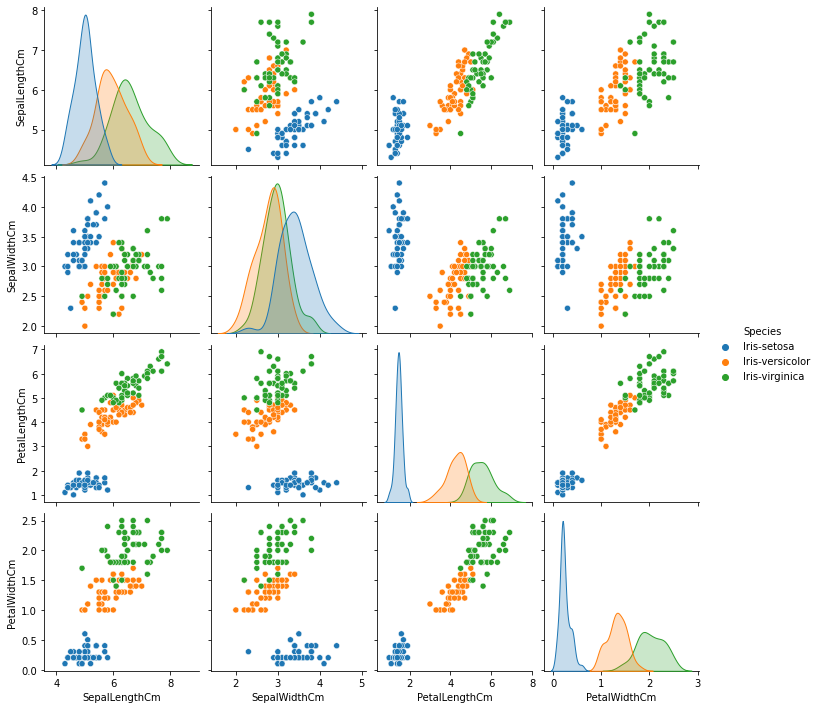

In [3]:
### Шаг 2. Подготовка тренировочных данных

# получение данных
iris_data = pd.read_csv("Iris.csv")

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [4]:
### Обучение двухслойных нейронных сетей

neuron_numbers = [3, 5, 7, 10]
learning_rates = [0.001, 0.005, 0.01]
epochs = [3000, 5000, 10000, 15000]

for epoch in epochs:
    for neuron_numb in neuron_numbers:
        for learning_rate in learning_rates:
            w0, w1, layer2, errors, accuracy_train, accuracy_test = nn_2layer_training(X_train, X_test, 
                                                                                       y_train, y_test, 
                                                                                       neuron_numb=neuron_numb, 
                                                                                       learning_rate=learning_rate, 
                                                                                       epochs=epoch)
            # черчение диаграммы точности в зависимости от обучения
            # print_errors(errors)
            # print_comparison(layer2, y_train)
            
            print(f'Аккуратность двухслойной нейронной сети neuron_numb={neuron_numb:^3}' 
                  f'learning_rate={learning_rate:^5} epochs={epoch:^5}: '
                  f'{accuracy_train:.2f}% трейн/{accuracy_test:.2f}% тест.')

Аккуратность двухслойной нейронной сети neuron_numb= 3 learning_rate=0.001 epochs=3000 : 58.54% трейн/58.84% тест.
Аккуратность двухслойной нейронной сети neuron_numb= 3 learning_rate=0.005 epochs=3000 : 75.82% трейн/77.53% тест.
Аккуратность двухслойной нейронной сети neuron_numb= 3 learning_rate=0.01  epochs=3000 : 79.64% трейн/81.02% тест.
Аккуратность двухслойной нейронной сети neuron_numb= 5 learning_rate=0.001 epochs=3000 : 59.84% трейн/60.44% тест.
Аккуратность двухслойной нейронной сети neuron_numb= 5 learning_rate=0.005 epochs=3000 : 76.71% трейн/78.42% тест.
Аккуратность двухслойной нейронной сети neuron_numb= 5 learning_rate=0.01  epochs=3000 : 82.73% трейн/84.02% тест.
Аккуратность двухслойной нейронной сети neuron_numb= 7 learning_rate=0.001 epochs=3000 : 64.33% трейн/65.44% тест.
Аккуратность двухслойной нейронной сети neuron_numb= 7 learning_rate=0.005 epochs=3000 : 77.38% трейн/79.05% тест.
Аккуратность двухслойной нейронной сети neuron_numb= 7 learning_rate=0.01  epoch

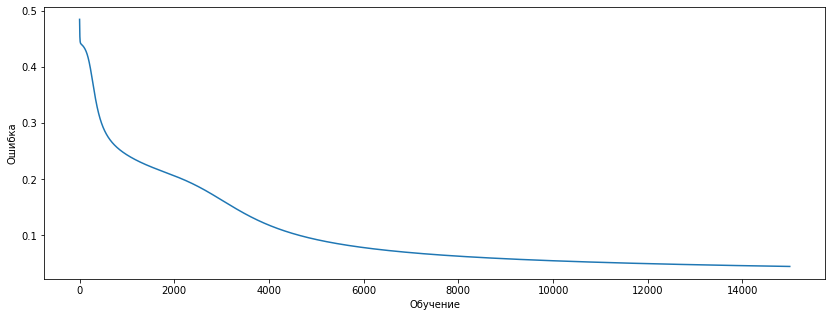

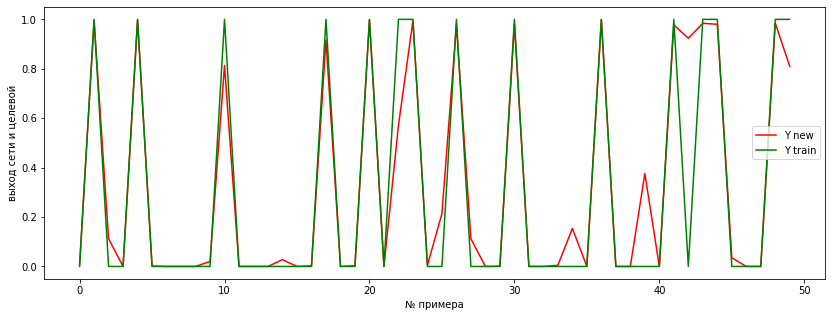

Аккуратность нейронной сети на трейне 95.54%


In [5]:
### Обучение двухслойной нейронной сети на отобранных оптимальных параметрах

neuron_numb = 10

w0 = 2*np.random.random((4, neuron_numb)) - 1 
w1 = 2*np.random.random((neuron_numb, 3)) - 1

# скорость обучения (learning rate)
n = 0.01

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(15000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    # коррекция
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Демонстрация полученных результатов
print_errors(errors)
print_comparison(layer2, y_train)
        
print("Аккуратность нейронной сети на трейне " + str(round(accuracy,2)) + "%")

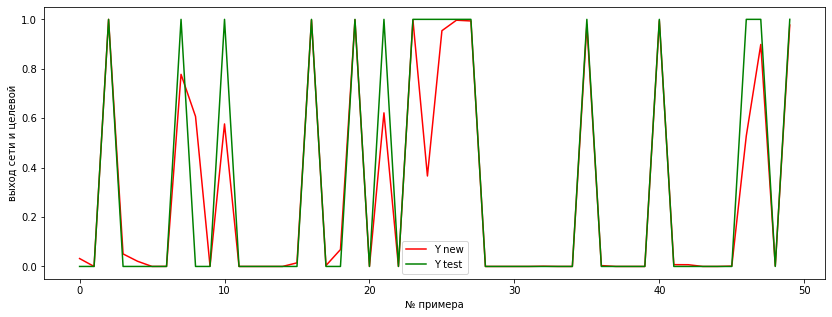

Аккуратность нейронной сети на тесте 95.21%


In [6]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100

print_comparison(layer2_t, y_test, label='Y test')

print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

Обучим модели с большим количеством слоев.

In [7]:
### Обучение трехслойных нейронных сетей

neuron_numbers = [3, 5, 7, 10]
learning_rates = [0.001, 0.005, 0.01]
epochs = [3000, 5000, 10000, 15000]

for epoch in epochs:
    for neuron_numb in neuron_numbers:
        for learning_rate in learning_rates:
            w0, w1, w2, layer3, errors, accuracy_train, accuracy_test = nn_3layer_training(X_train, X_test, 
                                                                                       y_train, y_test, 
                                                                                       neuron_numb=neuron_numb, 
                                                                                       learning_rate=learning_rate, 
                                                                                       epochs=epoch)
            # черчение диаграммы точности в зависимости от обучения
            # print_errors(errors)
            # print_comparison(layer3, y_train)
            
            print(f'Аккуратность трехслойной нейронной сети neuron_numb={neuron_numb:^3}' 
                  f'learning_rate={learning_rate:^5} epochs={epoch:^5}: '
                  f'{accuracy_train:.2f}% трейн/{accuracy_test:.2f}% тест.')

Аккуратность трехслойной нейронной сети neuron_numb= 3 learning_rate=0.001 epochs=3000 : 55.75% трейн/55.61% тест.
Аккуратность трехслойной нейронной сети neuron_numb= 3 learning_rate=0.005 epochs=3000 : 75.36% трейн/77.09% тест.
Аккуратность трехслойной нейронной сети neuron_numb= 3 learning_rate=0.01  epochs=3000 : 79.07% трейн/80.19% тест.
Аккуратность трехслойной нейронной сети neuron_numb= 5 learning_rate=0.001 epochs=3000 : 55.81% трейн/55.69% тест.
Аккуратность трехслойной нейронной сети neuron_numb= 5 learning_rate=0.005 epochs=3000 : 77.12% трейн/78.66% тест.
Аккуратность трехслойной нейронной сети neuron_numb= 5 learning_rate=0.01  epochs=3000 : 90.91% трейн/91.11% тест.
Аккуратность трехслойной нейронной сети neuron_numb= 7 learning_rate=0.001 epochs=3000 : 58.89% трейн/59.33% тест.
Аккуратность трехслойной нейронной сети neuron_numb= 7 learning_rate=0.005 epochs=3000 : 82.13% трейн/83.35% тест.
Аккуратность трехслойной нейронной сети neuron_numb= 7 learning_rate=0.01  epoch

In [8]:
### Обучение четырехслойных нейронных сетей

neuron_numbers = [5, 7, 10]
learning_rates = [0.001, 0.005, 0.01]
epochs = [3000, 5000, 10000, 15000]

for epoch in epochs:
    for neuron_numb in neuron_numbers:
        for learning_rate in learning_rates:
            w0, w1, w2, w3, layer4, errors, accuracy_train, accuracy_test = nn_4layer_training(X_train, X_test, 
                                                                                       y_train, y_test, 
                                                                                       neuron_numb=neuron_numb, 
                                                                                       learning_rate=learning_rate, 
                                                                                       epochs=epoch)
            # черчение диаграммы точности в зависимости от обучения
            # print_errors(errors)
            # print_comparison(layer3, y_train)
            
            print(f'Аккуратность четырехслойной нейронной сети neuron_numb={neuron_numb:^2}' 
                  f'learning_rate={learning_rate:^5} epochs={epoch:^5}:'
                  f'{accuracy_train:.2f}% трейн/{accuracy_test:.2f}% тест.')

Аккуратность четырехслойной нейронной сети neuron_numb=5 learning_rate=0.001 epochs=3000 :55.62% трейн/55.45% тест.
Аккуратность четырехслойной нейронной сети neuron_numb=5 learning_rate=0.005 epochs=3000 :61.31% трейн/61.81% тест.
Аккуратность четырехслойной нейронной сети neuron_numb=5 learning_rate=0.01  epochs=3000 :73.25% трейн/73.85% тест.
Аккуратность четырехслойной нейронной сети neuron_numb=7 learning_rate=0.001 epochs=3000 :55.62% трейн/55.44% тест.
Аккуратность четырехслойной нейронной сети neuron_numb=7 learning_rate=0.005 epochs=3000 :69.88% трейн/71.53% тест.
Аккуратность четырехслойной нейронной сети neuron_numb=7 learning_rate=0.01  epochs=3000 :90.76% трейн/90.76% тест.
Аккуратность четырехслойной нейронной сети neuron_numb=10learning_rate=0.001 epochs=3000 :55.89% трейн/55.78% тест.
Аккуратность четырехслойной нейронной сети neuron_numb=10learning_rate=0.005 epochs=3000 :84.02% трейн/84.78% тест.
Аккуратность четырехслойной нейронной сети neuron_numb=10learning_rate=0

На основе полученных результатов можно сделать вывод, что в данном примере увеличение каждого из следующих параметров при неизменности остальных приводило к улучшению точности модели:
- количество нейронов во внутренних слоях;
- скорость обучения;
- количество эпох.

Наоборот уменьшение кажого из них приводит к ухудшению точности.

Увеличение количества слоев при неизменности остальных параметров также привело к незначительному улучшению точности модели.

Можно предположить, что данная тенденция наблюдается только до определенного порога каждого из параметров, при превышении которого качество модели будет ухудшаться.